# Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv


# Dataset Loading

In [3]:
train = pd.read_csv(r'D:\Project Phase II\Dataset\finaltrain.csv',encoding='cp1252')
test = pd.read_csv(r'D:\Project Phase II\Dataset\finaltest.csv',encoding='cp1252') #test_set1 
autrain = pd.read_csv(r'D:\Project Phase II\Dataset\UNSW_NB15_training-set.csv',encoding='cp1252') #train_set2
autest = pd.read_csv(r'D:\Project Phase II\Dataset\UNSW_NB15_testing-set.csv',encoding='cp1252') #test_set2

C:\Users\sathi\AppData\Local\Temp\ipykernel_19424\1785680868.py:1: DtypeWarning: Columns (46) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv(r'D:\Project Phase II\Dataset\finaltrain.csv',encoding='cp1252')
C:\Users\sathi\AppData\Local\Temp\ipykernel_19424\1785680868.py:2: DtypeWarning: Columns (46) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv(r'D:\Project Phase II\Dataset\finaltest.csv',encoding='cp1252') #test_set1


# Data Preprocessing

## Preprocess train-test datasets

In [4]:
todrop = ['sloss', 'dloss','stcpb', 'dtcpb', 'trans_depth', 'Stime', 'Ltime','tcprtt', 'ct_flw_http_mthd', 
        'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm',
        'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat']
        
todropButIncStimeLtime = ['sloss', 'dloss','stcpb', 'dtcpb', 'trans_depth','tcprtt', 'ct_flw_http_mthd', 
        'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm',
        'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat']

reducedTrain = train.drop(todrop, axis = 1)
reducedTest = test.drop(todropButIncStimeLtime, axis = 1)
reducedTrain = reducedTrain.drop_duplicates()
reducedTest = reducedTest.drop_duplicates()

trainAttributes = reducedTrain.drop(['srcip','sport','dstip','dsport','Label'], axis = 1)
trainLabel = reducedTrain['Label']
testAttributes = reducedTest.drop(['srcip','sport','dstip','dsport','Label'], axis = 1)
testLabel = reducedTest['Label']

train = reducedTrain
test = reducedTest

train = train.drop_duplicates(['srcip','sport', 'dstip', 'dsport', 'sttl', 'dttl', 'swin', 'dwin'], keep = 'last')
test = test.drop_duplicates(['srcip','sport', 'dstip', 'dsport', 'sttl', 'dttl', 'swin', 'dwin'], keep = 'last')
testWithStimeLtime = test[['srcip', 'sport', 'dstip', 'dsport', 'Stime', 'Ltime']]
test = test.drop(['Stime','Ltime'], axis = 1)

Use stcpb, dtcpb to substitute the unavailablity of ip port

In [5]:
audrop = ['ï»¿id', 'rate', 'sloss', 'dloss','trans_depth','tcprtt','ct_srv_src','ct_dst_ltm',
        'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
        'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
        'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat']

audrop1 = ['ï»¿id', 'is_sm_ips_ports','attack_cat']

protodiff = ['arp', 'igmp', 'sctp', 'gre', 'ggp', 'ip',
       'ipnip', 'st2', 'argus', 'chaos', 'egp', 'emcon', 'nvp', 'pup',
       'xnet', 'mux', 'dcn', 'hmp', 'prm', 'trunk-1', 'trunk-2',
       'xns-idp', 'leaf-1', 'leaf-2', 'irtp', 'rdp', 'netblt', 'mfe-nsp',
       'merit-inp', '3pc', 'idpr', 'ddp', 'idpr-cmtp', 'tp++', 'ipv6',
       'sdrp', 'ipv6-frag', 'ipv6-route', 'idrp', 'mhrp', 'i-nlsp', 'rvd',
       'mobile', 'narp', 'skip', 'tlsp', 'ipv6-no', 'any', 'ipv6-opts',
       'cftp', 'sat-expak', 'ippc', 'kryptolan', 'sat-mon', 'cpnx', 'wsn',
       'pvp', 'br-sat-mon', 'sun-nd', 'wb-mon', 'vmtp', 'ttp', 'vines',
       'nsfnet-igp', 'dgp', 'eigrp', 'tcf', 'sprite-rpc', 'larp', 'mtp',
       'ax.25', 'ipip', 'aes-sp3-d', 'micp', 'encap', 'pri-enc', 'gmtp',
       'ifmp', 'pnni', 'qnx', 'scps', 'cbt', 'bbn-rcc', 'igp', 'bna',
       'swipe', 'visa', 'ipcv', 'cphb', 'iso-tp4', 'wb-expak', 'sep',
       'secure-vmtp', 'xtp', 'il', 'rsvp', 'unas', 'fc', 'iso-ip',
       'etherip', 'pim', 'aris', 'a/n', 'ipcomp', 'snp', 'compaq-peer',
       'ipx-n-ip', 'pgm', 'vrrp', 'l2tp', 'zero', 'ddx', 'iatp', 'stp',
       'srp', 'uti', 'sm', 'smp', 'isis', 'ptp', 'fire', 'crtp', 'crudp',
       'sccopmce', 'iplt', 'pipe', 'sps', 'ib']

autrain = autrain.drop(audrop1, axis = 1)
autrain.rename(columns={'dinpkt':'Dintpkt','djit':'Djit','dload':'Dload','dpkts':'Dpkts','label':'Label','sinpkt':'Sintpkt','sjit':'Sjit', 'sload':'Sload', 'spkts':'Spkts','dmean':'dmeansz','response_body_len':'res_bdy_len', 'smean':'smeansz'}, inplace=True)
# autrain = autrain[(autrain['proto']=='tcp') | (autrain['proto']=='udp') | (autrain['proto']=='ospf')]
autrain = autrain[(autrain['service']=='ssh') | (autrain['service']=='ftp-data ')  | (autrain['service']=='ftp') | (autrain['service']=='-') | (autrain['service']=='dns') | (autrain['service']=='smtp') | (autrain['service']=='http') | (autrain['service']=='radius') | (autrain['service']=='pop3') ]
autrain = autrain[(autrain['state'] == 'CON') | (autrain['state'] == 'RST') | (autrain['state'] == 'FIN') | (autrain['state'] == 'ACC') | (autrain['state'] == 'REQ') | (autrain['state'] == 'INT')]

autrain['proto'].replace("rtp", -1, inplace = True)
autrain['proto'].replace("tcp", 0, inplace = True)
autrain['proto'].replace("udp", 1, inplace = True)
autrain['proto'].replace("ospf", 2, inplace = True)
autrain['proto'].replace(to_replace=protodiff, value=[20]*len(protodiff) , inplace=True)

autrain['service'].replace("ssh", 0, inplace = True)
autrain['service'].replace("ftp-data", 1, inplace = True)
autrain['service'].replace("ftp", 2, inplace = True)
autrain['service'].replace("-", 3, inplace = True)
autrain['service'].replace("dns", 4, inplace = True)
autrain['service'].replace("smtp", 5, inplace = True)
autrain['service'].replace("http", 6, inplace = True)
autrain['service'].replace("radius", 7, inplace = True)
autrain['service'].replace("pop3", 8, inplace = True)

autrain['state'].replace("CON", 0, inplace = True)
autrain['state'].replace("RST", 1, inplace = True)
autrain['state'].replace("FIN", 2, inplace = True)
autrain['state'].replace("ACC", 3, inplace = True)
autrain['state'].replace("REQ", 4, inplace = True)
autrain['state'].replace("INT", 5, inplace = True)

for column in autrain.columns:
        if column != 'Label':
                try:
                        col_mean = sum(autrain[column]) / len(autrain[column])
                        col_std = (sum((x - col_mean) ** 2 for x in autrain[column]) / len(autrain[column])) ** 0.5
                        autrain[column] = [(x - col_mean) / col_std for x in autrain[column]]
                except:
                        print("Failing: ", column, type(column))


autrain = autrain.drop_duplicates(['sttl', 'dttl', 'swin', 'dwin','stcpb','dtcpb'], keep = 'last')
autrainAttributes = autrain.drop(['Label'], axis = 1)
autrainLabel = autrain['Label']

In [6]:


autest = autest.drop(audrop1, axis = 1)
#Change column names of autest
autest.rename(columns={'dinpkt':'Dintpkt','djit':'Djit','dload':'Dload','dpkts':'Dpkts','label':'Label','sinpkt':'Sintpkt','sjit':'Sjit', 'sload':'Sload', 'spkts':'Spkts','dmean':'dmeansz','response_body_len':'res_bdy_len', 'smean':'smeansz'}, inplace=True)
# autest = autest[(autest['proto']=='tcp') | (autest['proto']=='udp') | (autest['proto']=='ospf')]
autest = autest[(autest['service']=='ssh') | (autest['service']=='ftp-data ')  | (autest['service']=='ftp') | (autest['service']=='-') | (autest['service']=='dns') | (autest['service']=='smtp') | (autest['service']=='http') | (autest['service']=='radius') | (autest['service']=='pop3') ]
autest = autest[(autest['state'] == 'CON') | (autest['state'] == 'RST') | (autest['state'] == 'FIN') | (autest['state'] == 'ACC') | (autest['state'] == 'REQ') | (autest['state'] == 'INT')]

autest['proto'].replace("rtp", -1, inplace = True)
autest['proto'].replace("tcp", 0, inplace = True)
autest['proto'].replace("udp", 1, inplace = True)
autest['proto'].replace("ospf", 2, inplace = True)
autest['proto'].replace(to_replace=protodiff, value=[20]*len(protodiff), inplace=True)

autest['service'].replace("ssh", 0, inplace = True)
autest['service'].replace("ftp-data", 1, inplace = True)
autest['service'].replace("ftp", 2, inplace = True)
autest['service'].replace("-", 3, inplace = True)
autest['service'].replace("dns", 4, inplace = True)
autest['service'].replace("smtp", 5, inplace = True)
autest['service'].replace("http", 6, inplace = True)
autest['service'].replace("radius", 7, inplace = True)
autest['service'].replace("pop3", 8, inplace = True)

autest['state'].replace("CON", 0, inplace = True)
autest['state'].replace("RST", 1, inplace = True)
autest['state'].replace("FIN", 2, inplace = True)
autest['state'].replace("ACC", 3, inplace = True)
autest['state'].replace("REQ", 4, inplace = True)
autest['state'].replace("INT", 5, inplace = True)

for column in autest.columns:
        try:
                if column != 'Label':
                        col_mean = sum(autest[column]) / len(autest[column])
                        col_std = (sum((x - col_mean) ** 2 for x in autest[column]) / len(autest[column])) ** 0.5
                        autest[column] = [(x - col_mean) / col_std for x in autest[column]]
        except:
                print("Failing: ",column, type(column))


autest = autest.drop_duplicates(['sttl', 'dttl', 'swin', 'dwin','stcpb','dtcpb'], keep = 'last')
autestAttributes = autest.drop(['Label'], axis = 1)
autestLabel = autest['Label']

In [7]:
#Pick 13671 records with Label = 0 and 13671 records with Label = 1 in autest
autest = autest.sample(frac=1).groupby('Label').head(13671)

# Input Transformation

## Training

In [8]:
nodes = set()
trainUnique = train
for i in range(len(train)):
    src = str(train['srcip'].iloc[i])+':'+ str(train['sport'].iloc[i]) + ':' + str(train['sttl'].iloc[i])+':'+str(train['swin'].iloc[i])
    dst = str(train['dstip'].iloc[i])+':'+str(train['dsport'].iloc[i]) + ':' + str(train['dttl'].iloc[i])+':'+str(train['dwin'].iloc[i])
    nodes.add(src)
    nodes.add(dst)


#Find unique (srcip,sport,dstip,dsport) tuples in train
train_tuples = set()
for i in range(len(train)):
    train_tuples.add((train['srcip'].iloc[i], train['sport'].iloc[i], train['dstip'].iloc[i], train['dsport'].iloc[i], train['sttl'].iloc[i], train['swin'].iloc[i], train['dttl'].iloc[i], train['dwin'].iloc[i]))

In [10]:
xLookUp = {}
x = []
count = 0
edge_index = []
edge_attr = []
for i in range(len(train)):
    src = str(train['srcip'].iloc[i])+':'+ str(train['sport'].iloc[i]) + ':' + str(train['sttl'].iloc[i])+':'+str(train['swin'].iloc[i])
    dst = str(train['dstip'].iloc[i])+':'+str(train['dsport'].iloc[i]) + ':' + str(train['dttl'].iloc[i])+':'+str(train['dwin'].iloc[i])
    if src not in xLookUp:
        xLookUp[src] = count
        x.append([int(train['sttl'].iloc[i]), int(train['swin'].iloc[i])])
        count += 1
    if dst not in xLookUp:
        xLookUp[dst] = count
        x.append([int(train['dttl'].iloc[i]), int(train['dwin'].iloc[i])])
        count += 1
    edge_index.append([xLookUp[src], xLookUp[dst]])
    edge_attr.append(list(train.iloc[i].drop(['srcip', 'sport', 'dstip', 'dsport', 'sttl', 'dttl','swin','dwin','Label']).values))

x_tensor = torch.tensor(x, dtype=torch.float)
edge_index_tensor = torch.tensor(edge_index, dtype=torch.long).t()  # Transpose for correct format
edge_attr_tensor = torch.tensor(edge_attr, dtype=torch.float)
print(x_tensor.shape, edge_index_tensor.shape, edge_attr_tensor.shape)

torch.Size([97138, 2]) torch.Size([2, 79856]) torch.Size([79856, 20])


## Testing

In [11]:
testnodes = set()
testUnique = test
for i in range(len(test)):
    src = str(test['srcip'].iloc[i])+':'+ str(test['sport'].iloc[i]) + ':' + str(test['sttl'].iloc[i])+':'+str(test['swin'].iloc[i])
    dst = str(test['dstip'].iloc[i])+':'+str(test['dsport'].iloc[i]) + ':' + str(test['dttl'].iloc[i])+':'+str(test['dwin'].iloc[i])
    testnodes.add(src)
    testnodes.add(dst)

test_tuples = set()
for i in range(len(test)):
    test_tuples.add((test['srcip'].iloc[i], test['sport'].iloc[i], test['dstip'].iloc[i], test['dsport'].iloc[i], test['sttl'].iloc[i], test['swin'].iloc[i], test['dttl'].iloc[i], test['dwin'].iloc[i]))

In [12]:
xtestLookUp = {}
xtest = []
count = 0
edge_index_test = []
edge_attr_test = []
for i in range(len(test)):
    src = str(test['srcip'].iloc[i])+':'+ str(test['sport'].iloc[i]) + ':' + str(test['sttl'].iloc[i])+':'+str(test['swin'].iloc[i])
    dst = str(test['dstip'].iloc[i])+':'+str(test['dsport'].iloc[i]) + ':' + str(test['dttl'].iloc[i])+':'+str(test['dwin'].iloc[i])
    if src not in xtestLookUp:
        xtestLookUp[src] = count
        xtest.append([int(test['sttl'].iloc[i]), int(test['swin'].iloc[i])])
        count += 1
    if dst not in xtestLookUp:
        xtestLookUp[dst] = count
        xtest.append([int(test['dttl'].iloc[i]), int(test['dwin'].iloc[i])])
        count += 1
    edge_index_test.append([xtestLookUp[src], xtestLookUp[dst]])
    edge_attr_test.append(list(test.iloc[i].drop(['srcip', 'sport', 'dstip', 'dsport', 'sttl', 'dttl','swin','dwin','Label']).values))
x_test_tensor = torch.tensor(xtest, dtype=torch.float)
edge_index_test_tensor = torch.tensor(edge_index_test, dtype=torch.long).t()
edge_attr_test_tensor = torch.tensor(edge_attr_test, dtype=torch.float)
print(x_test_tensor.shape, edge_index_test_tensor.shape, edge_attr_test_tensor.shape)

torch.Size([42906, 2]) torch.Size([2, 34430]) torch.Size([34430, 20])


In [13]:
autrainnodes = set()
autrainUnique = autrain
for i in range(len(autrain)):
    src = str(autrain['sttl'].iloc[i])+':'+str(autrain['swin'].iloc[i]) + str(autrain['stcpb'].iloc[i]) + str(autrain['sbytes'].iloc[i]) + str(autrain['Sload'].iloc[i])+ str(autrain['Spkts'].iloc[i])+ str(autrain['smeansz'].iloc[i])+ str(autrain['Sjit'].iloc[i]) + str(autrain['Sintpkt'].iloc[i])
    dst = str(autrain['dttl'].iloc[i])+':'+str(autrain['dwin'].iloc[i]) + str(autrain['dtcpb'].iloc[i]) + str(autrain['dbytes'].iloc[i]) + str(autrain['Dload'].iloc[i])+ str(autrain['Dpkts'].iloc[i])+ str(autrain['dmeansz'].iloc[i])+ str(autrain['Djit'].iloc[i]) + str(autrain['Dintpkt'].iloc[i])
    autrainnodes.add(src)
    autrainnodes.add(dst)

autrain_tuples = set()
for i in range(len(autrain)):
    autrain_tuples.add((autrain['sttl'].iloc[i], autrain['swin'].iloc[i], autrain['dttl'].iloc[i], autrain['dwin'].iloc[i], autrain['stcpb'].iloc[i], autrain['dtcpb'].iloc[i], autrain['sbytes'].iloc[i], autrain['dbytes'].iloc[i], autrain['Sload'].iloc[i], autrain['Dload'].iloc[i], autrain['Spkts'].iloc[i], autrain['Dpkts'].iloc[i], autrain['smeansz'].iloc[i], autrain['dmeansz'].iloc[i], autrain['Sjit'].iloc[i], autrain['Djit'].iloc[i], autrain['Sintpkt'].iloc[i], autrain['Dintpkt'].iloc[i]))

In [14]:
xautrainLookUp = {}
xautrain = []
count = 0
edge_index_autrain = []
edge_attr_autrain = []

for i in range(len(autrain)):
    src = str(autrain['sttl'].iloc[i])+':'+str(autrain['swin'].iloc[i]) + str(autrain['stcpb'].iloc[i]) + str(autrain['sbytes'].iloc[i]) + str(autrain['Sload'].iloc[i])+ str(autrain['Spkts'].iloc[i])+ str(autrain['smeansz'].iloc[i])+ str(autrain['Sjit'].iloc[i]) + str(autrain['Sintpkt'].iloc[i])
    dst = str(autrain['dttl'].iloc[i])+':'+str(autrain['dwin'].iloc[i]) + str(autrain['dtcpb'].iloc[i]) + str(autrain['dbytes'].iloc[i]) + str(autrain['Dload'].iloc[i])+ str(autrain['Dpkts'].iloc[i])+ str(autrain['dmeansz'].iloc[i])+ str(autrain['Djit'].iloc[i]) + str(autrain['Dintpkt'].iloc[i])
    if src not in xautrainLookUp:
        xautrainLookUp[src] = count
        # xautrain.append([0,int(autrain['sttl'].iloc[i]), int(autrain['swin'].iloc[i])])
        xautrain.append([int(autrain['sttl'].iloc[i]), int(autrain['swin'].iloc[i]), int(autrain['sbytes'].iloc[i]), int(autrain['Sload'].iloc[i]), int(autrain['Spkts'].iloc[i]), int(autrain['smeansz'].iloc[i]), int(autrain['Sjit'].iloc[i]), int(autrain['Sintpkt'].iloc[i])])
        count += 1
    if dst not in xautrainLookUp:
        xautrainLookUp[dst] = count
        # xautrain.append([0, int(autrain['dttl'].iloc[i]), int(autrain['dwin'].iloc[i])])
        xautrain.append([int(autrain['dttl'].iloc[i]), int(autrain['dwin'].iloc[i]), int(autrain['dbytes'].iloc[i]), int(autrain['Dload'].iloc[i]), int(autrain['Dpkts'].iloc[i]), int(autrain['dmeansz'].iloc[i]), int(autrain['Djit'].iloc[i]), int(autrain['Dintpkt'].iloc[i])])
        count += 1
    edge_index_autrain.append([xautrainLookUp[src], xautrainLookUp[dst]])
    edge_attr_autrain.append(list(autrain.iloc[i].drop(['sttl', 'dttl','swin','dwin','Label','stcpb','dtcpb', 'sbytes', 'dbytes', 'Sload', 'Dload', 'Spkts', 'Dpkts', 'smeansz', 'dmeansz', 'Sjit', 'Djit', 'Sintpkt', 'Dintpkt']).values))



# Convert x to tensor
x_autrain_tensor = torch.tensor(xautrain, dtype=torch.float)

# Convert edge_index to tensor
edge_index_autrain_tensor = torch.tensor(edge_index_autrain, dtype=torch.long).t()  # Transpose for correct format

# Convert edge_attr to tensor
edge_attr_autrain_tensor = torch.tensor(edge_attr_autrain, dtype=torch.float)

print(x_autrain_tensor.shape, edge_index_autrain_tensor.shape, edge_attr_autrain_tensor.shape)

torch.Size([143841, 8]) torch.Size([2, 71930]) torch.Size([71930, 23])


In [15]:
autestnodes = set()
autestUnique = autest
for i in range(len(autest)):
    src = str(autest['sttl'].iloc[i])+':'+str(autest['swin'].iloc[i]) + str(autest['stcpb'].iloc[i]) + str(autest['sbytes'].iloc[i]) + str(autest['Sload'].iloc[i])+ str(autest['Spkts'].iloc[i])+ str(autest['smeansz'].iloc[i])+ str(autest['Sjit'].iloc[i]) + str(autest['Sintpkt'].iloc[i])
    dst = str(autest['dttl'].iloc[i])+':'+str(autest['dwin'].iloc[i]) + str(autest['dtcpb'].iloc[i]) + str(autest['dbytes'].iloc[i]) + str(autest['Dload'].iloc[i])+ str(autest['Dpkts'].iloc[i])+ str(autest['dmeansz'].iloc[i])+ str(autest['Djit'].iloc[i]) + str(autest['Dintpkt'].iloc[i])
    autestnodes.add(src)
    autestnodes.add(dst)


#Find unique (srcip,sport,dstip,dsport) tuples in train
autest_tuples = set()
for i in range(len(autest)):
    autest_tuples.add((autest['sttl'].iloc[i], autest['swin'].iloc[i], autest['dttl'].iloc[i], autest['dwin'].iloc[i], autest['stcpb'].iloc[i], autest['dtcpb'].iloc[i], autest['sbytes'].iloc[i], autest['dbytes'].iloc[i], autest['Sload'].iloc[i], autest['Dload'].iloc[i], autest['Spkts'].iloc[i], autest['Dpkts'].iloc[i], autest['smeansz'].iloc[i], autest['dmeansz'].iloc[i], autest['Sjit'].iloc[i], autest['Djit'].iloc[i], autest['Sintpkt'].iloc[i], autest['Dintpkt'].iloc[i]))

In [16]:
xautestLookUp = {}
xautest = []
count = 0
edge_index_autest = []
edge_attr_autest = []

for i in range(len(autest)):
    src = str(autest['sttl'].iloc[i])+':'+str(autest['swin'].iloc[i]) + str(autest['stcpb'].iloc[i]) + str(autest['sbytes'].iloc[i]) + str(autest['Sload'].iloc[i])+ str(autest['Spkts'].iloc[i])+ str(autest['smeansz'].iloc[i])+ str(autest['Sjit'].iloc[i]) + str(autest['Sintpkt'].iloc[i])
    dst = str(autest['dttl'].iloc[i])+':'+str(autest['dwin'].iloc[i]) + str(autest['dtcpb'].iloc[i]) + str(autest['dbytes'].iloc[i]) + str(autest['Dload'].iloc[i])+ str(autest['Dpkts'].iloc[i])+ str(autest['dmeansz'].iloc[i])+ str(autest['Djit'].iloc[i]) + str(autest['Dintpkt'].iloc[i])
    if src not in xautestLookUp:
        xautestLookUp[src] = count
        # xautest.append([0,int(autest['sttl'].iloc[i]), int(autest['swin'].iloc[i])])
        xautest.append([int(autest['sttl'].iloc[i]), int(autest['swin'].iloc[i]), int(autest['sbytes'].iloc[i]), int(autest['Sload'].iloc[i]), int(autest['Spkts'].iloc[i]), int(autest['smeansz'].iloc[i]), int(autest['Sjit'].iloc[i]), int(autest['Sintpkt'].iloc[i])])
        count += 1
    if dst not in xautestLookUp:
        xautestLookUp[dst] = count
        # xautest.append([0, int(autest['dttl'].iloc[i]), int(autest['dwin'].iloc[i])])
        xautest.append([int(autest['dttl'].iloc[i]), int(autest['dwin'].iloc[i]), int(autest['dbytes'].iloc[i]), int(autest['Dload'].iloc[i]), int(autest['Dpkts'].iloc[i]), int(autest['dmeansz'].iloc[i]), int(autest['Djit'].iloc[i]), int(autest['Dintpkt'].iloc[i])])
        count += 1
    edge_index_autest.append([xautestLookUp[src], xautestLookUp[dst]])
    edge_attr_autest.append(list(autest.iloc[i].drop(['sttl', 'dttl','swin','dwin','Label','stcpb','dtcpb', 'sbytes', 'dbytes', 'Sload', 'Dload', 'Spkts', 'Dpkts', 'smeansz', 'dmeansz', 'Sjit', 'Djit', 'Sintpkt', 'Dintpkt']).values))



# Convert x to tensor
x_autest_tensor = torch.tensor(xautest, dtype=torch.float)

# Convert edge_index to tensor
edge_index_autest_tensor = torch.tensor(edge_index_autest, dtype=torch.long).t()  # Transpose for correct format

# Convert edge_attr to tensor
edge_attr_autest_tensor = torch.tensor(edge_attr_autest, dtype=torch.float)

print(x_autest_tensor.shape, edge_index_autest_tensor.shape, edge_attr_autest_tensor.shape)

torch.Size([54670, 8]) torch.Size([2, 27342]) torch.Size([27342, 23])


# GAT Model

## GAT Model Definition

nn.Linear appplies linear transformation to the incoming data: y = x * transpose(A) + b 


In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv

class GATClassifier(torch.nn.Module):
    def __init__(self, num_node_features, num_edge_features, hidden_channels, num_heads, num_classes):
        super(GATClassifier, self).__init__()
        self.conv1 = GATConv(num_node_features, hidden_channels, heads=num_heads, add_self_loops=False)
        self.conv2 = GATConv(hidden_channels * num_heads, hidden_channels, heads=num_heads, add_self_loops=False)
        # self.edge_classifier = nn.Linear(hidden_channels * 2 * num_heads + num_edge_features, num_classes)
        self.edge_classifier = nn.Sequential(
        nn.Linear(hidden_channels * 2 * num_heads + num_edge_features, hidden_channels),  # Linear layer
        nn.ReLU(),  # ReLU activation function
        nn.Linear(hidden_channels, num_classes)  # Linear layer
        )

    def forward(self, x, edge_index, edge_attr):
        # Apply graph attentional layers
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)

        # Concatenate node features with edge features
        num_edges = edge_index.size(1)
        node_x = x[edge_index[0]]
        node_x_other = x[edge_index[1]]
        edge_attr_padded = torch.cat([edge_attr, torch.zeros(num_edges - edge_attr.size(0), edge_attr.size(1))], dim=0)
        edge_x = torch.cat([node_x, node_x_other, edge_attr_padded], dim=1)

        # Classify edges into classes
        edge_scores = self.edge_classifier(edge_x)
        return edge_scores

## GAT Feature Transformation

User's train test

In [18]:
num_nodes = len(nodes)
num_edges = len(train_tuples)
num_node_features = 2
num_edge_features = 20
hidden_channels = 16
num_heads = 32
num_classes = 26

# Instantiate GAT classifier
model = GATClassifier(num_node_features, num_edge_features, hidden_channels, num_heads, num_classes)

# Forward pass
edge_scores_train = model(x_tensor, edge_index_tensor, edge_attr_tensor)

In [ ]:
num_nodes_test = len(testnodes)
num_edges_test = len(test_tuples)

# Forward pass
edge_scores_test = model(x_test_tensor, edge_index_test_tensor, edge_attr_test_tensor)

Author's train test

In [20]:
num_nodes_autrain = len(autrainnodes)
num_edges_autrain = len(autrain_tuples)

num_node_features = 8
num_edge_features = 23
hidden_channels = 16
num_heads = 16
num_classes = 39

# Instantiate GAT classifier
GATmodel = GATClassifier(num_node_features, num_edge_features, hidden_channels, num_heads, num_classes)
# Forward pass
edge_scores_autrain = GATmodel(x_autrain_tensor, edge_index_autrain_tensor, edge_attr_autrain_tensor)

In [21]:
num_nodes_autest = len(autestnodes)
num_edges_autest = len(autest_tuples)

# Forward pass
edge_scores_autest = GATmodel(x_autest_tensor, edge_index_autest_tensor, edge_attr_autest_tensor)

## Training and Testing

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import pandas as pd
import numpy as np


edge_scores_autrain_array = edge_scores_autrain.detach().numpy()
edge_scores_autest_array = edge_scores_autest.detach().numpy()

columns = [str('Dim')+str(i) for i in range(edge_scores_autrain_array.shape[1])]

edge_scores_autrain_df = pd.DataFrame(edge_scores_autrain_array, columns=columns)
edge_scores_autest_df = pd.DataFrame(edge_scores_autest_array, columns=columns)


trainLabel = autrain['Label']
autestLabel = autest['Label']
auX_train = edge_scores_autrain_df
auX_test = edge_scores_autest_df

# Initialize the KNN classifier
k = 10  # Number of neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the classifier
knn_classifier.fit(auX_train, trainLabel)

# Predictions on the test set
y_pred = knn_classifier.predict(auX_test)

# Calculate accuracy
report = classification_report(autestLabel, y_pred)
print("Classification Report: \n", report)
print('AuC Score: ', roc_auc_score(autestLabel, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.64      0.73     13671
           1       0.71      0.89      0.79     13671

    accuracy                           0.77     27342
   macro avg       0.78      0.77      0.76     27342
weighted avg       0.78      0.77      0.76     27342

AuC Score:  0.7676102699144174


## Train Test using user's dataset

In [ ]:
import pandas as pd
# Convert edge_scores tensor to a NumPy array
edge_scores_train_array = edge_scores_train.detach().numpy()
edge_scores_test_array = edge_scores_test.detach().numpy()
# Create a DataFrame from the NumPy array
columns = [str('Dim')+str(i) for i in range(edge_scores_train_array.shape[1])]
edge_scores_train_df = pd.DataFrame(edge_scores_train_array, columns=columns)
edge_scores_test_df = pd.DataFrame(edge_scores_test_array, columns=columns)
trainLabel = train['Label']
testLabel = test['Label']

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

X_train = edge_scores_train_df
X_test = edge_scores_test_df
y_train = trainLabel
y_test = testLabel

# Initialize the KNN classifier
k = 10  # Number of neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Calculate accuracy
report = classification_report(y_test, y_pred)
print("Classification Report: \n", report)
print('AuC Score: ', roc_auc_score(y_test, y_pred))

## Attack Sequence Trace Back

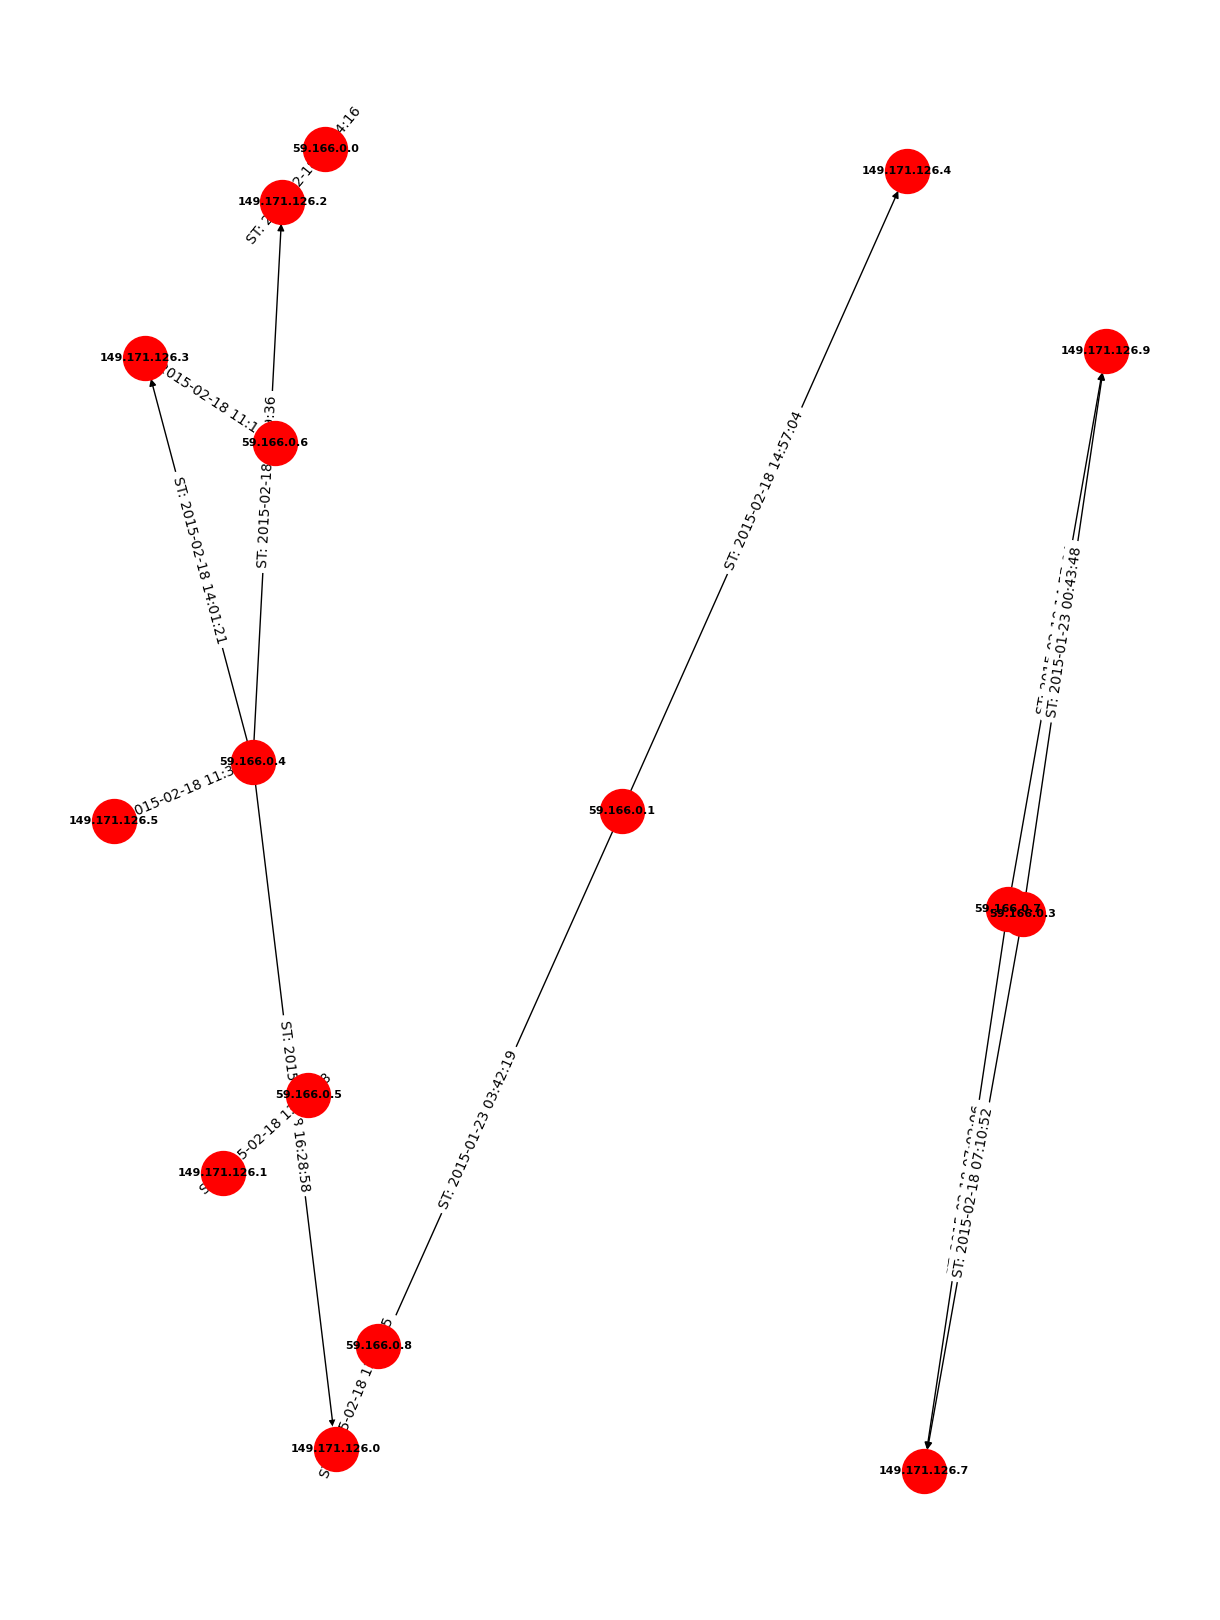

In [49]:
#Retrieve index positions of y_pred = 1
#Sample only 16 records for good visualisation
indices_of_ones = np.where(y_pred == 1)[0][100:116]

import networkx as nx
import matplotlib.pyplot as plt
from datetime import datetime

# Create a directed graph
traceBackG = nx.DiGraph()

for i in indices_of_ones:
    src = str(testWithStimeLtime.iloc[i]['srcip'])
    dst = str(testWithStimeLtime.iloc[i]['dstip'])
    traceBackG.add_node(src)
    traceBackG.add_node(dst)
    stime = datetime.fromtimestamp(testWithStimeLtime.iloc[i]['Stime']).strftime('%Y-%m-%d %H:%M:%S')
    ltime = datetime.fromtimestamp(testWithStimeLtime.iloc[i]['Ltime']).strftime('%Y-%m-%d %H:%M:%S')
    traceBackG.add_edge(src, dst, label="ST: " + str(stime))

plt.figure(3,figsize=(12,16)) 
pos = nx.spring_layout(traceBackG) 
nx.draw(traceBackG, pos, with_labels=True, node_size=1000, node_color='red', font_size=8, font_weight='bold')
node_labels = nx.get_node_attributes(traceBackG, 'label')
edge_labels = nx.get_edge_attributes(traceBackG, 'label')
nx.draw_networkx_edge_labels(traceBackG, pos, edge_labels=edge_labels)

plt.show()

In [50]:
#Convert to gephi format
nx.write_gexf(traceBackG, "traceBackG.gexf")